In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
signal_timings_df = pd.read_csv("signal_timings_data.csv")
signal_timings_df.head()


,Intersection,Green_Light_Duration,Red_Light_Duration
0,Intersection_1,107,87
1,Intersection_2,41,47
2,Intersection_3,43,119
3,Intersection_4,111,115
4,Intersection_5,56,85


In [5]:
traffic_flow_df = pd.read_csv('traffic_flow_data.csv')
traffic_flow_df.head()

,Intersection,Hour,Vehicle_Type,Vehicle_Count
0,Intersection_6,20,Car,357
1,Intersection_1,4,Public Transport,308
2,Intersection_4,16,Two-Wheeler,382
3,Intersection_4,3,Company Bus,207
4,Intersection_8,7,Public Transport,59


Initial Analysis

In [10]:
signal_timings_info = signal_timings_df.info()
traffic_flow_info = traffic_flow_df.info()
print(signal_timings_info)
print()
print(traffic_flow_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Intersection          10 non-null     object
 1   Green_Light_Duration  10 non-null     int64 
 2   Red_Light_Duration    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Intersection   240 non-null    object
 1   Hour           240 non-null    int64 
 2   Vehicle_Type   240 non-null    object
 3   Vehicle_Count  240 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.6+ KB
None

None


In [11]:
signal_timings_stats = signal_timings_df.describe()
traffic_flow_stats = traffic_flow_df.describe()
print(signal_timings_stats)
print(traffic_flow_stats)

       Green_Light_Duration  Red_Light_Duration
count             10.000000           10.000000
mean              70.800000           73.700000
std               26.922935           30.666848
min               41.000000           41.000000
25%               50.250000           47.500000
50%               64.000000           70.000000
75%               94.250000           95.250000
max              111.000000          119.000000
            Hour  Vehicle_Count
count  240.00000     240.000000
mean    11.56250     274.029167
std      7.08734     128.417057
min      0.00000      50.000000
25%      5.00000     158.750000
50%     11.00000     276.500000
75%     18.00000     391.250000
max     23.00000     499.000000


Visualization

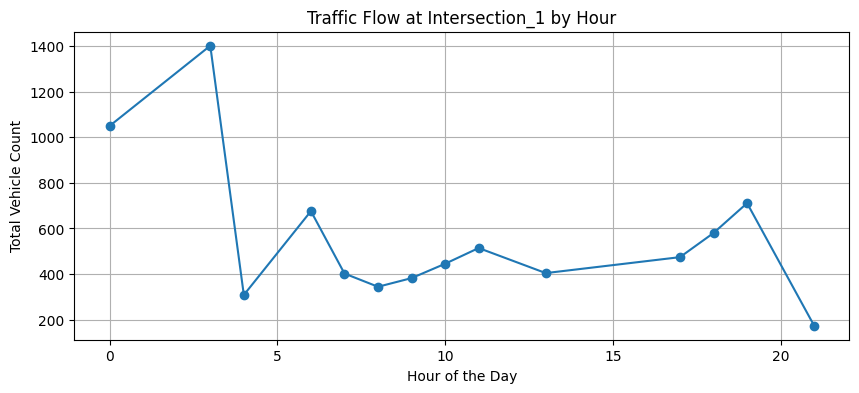

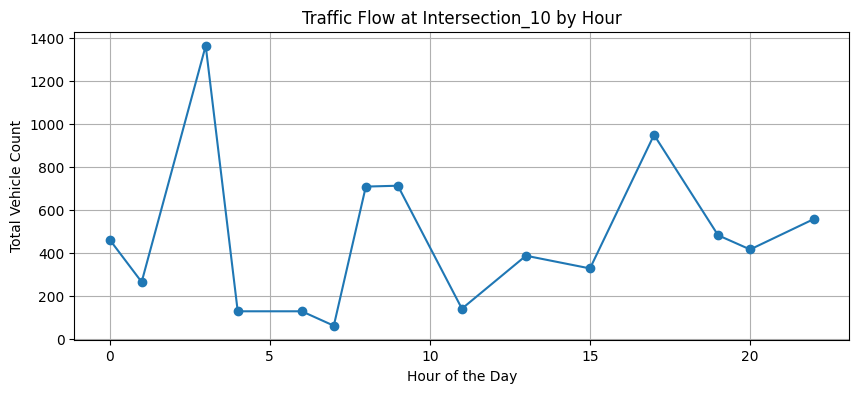

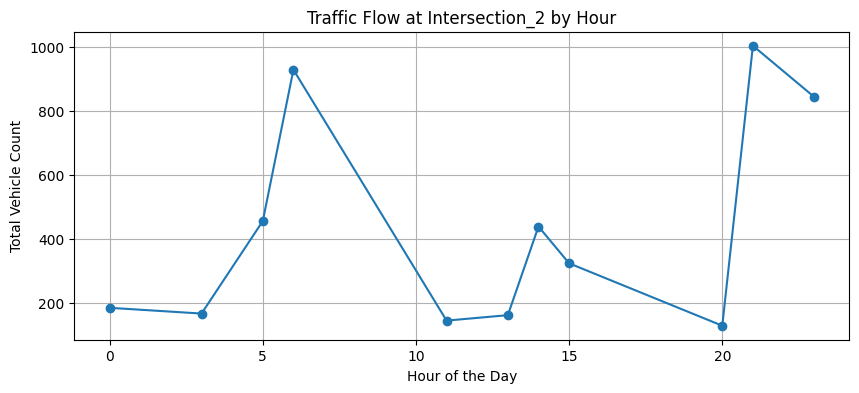

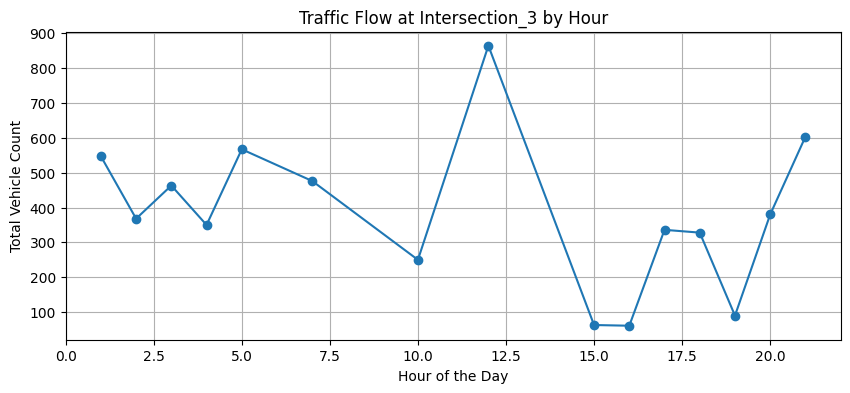

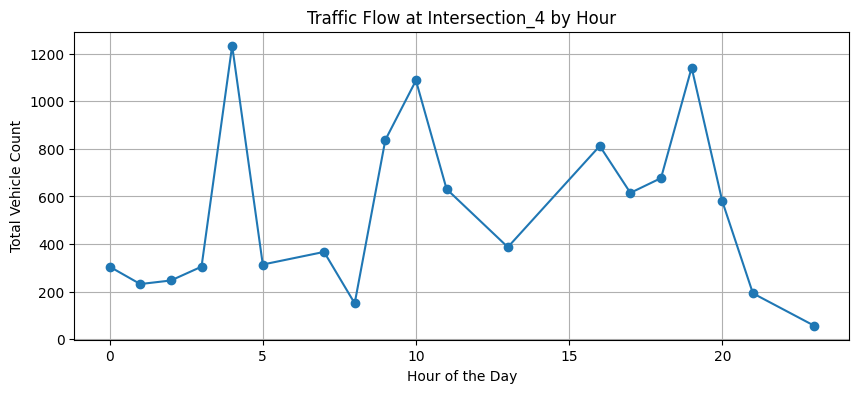

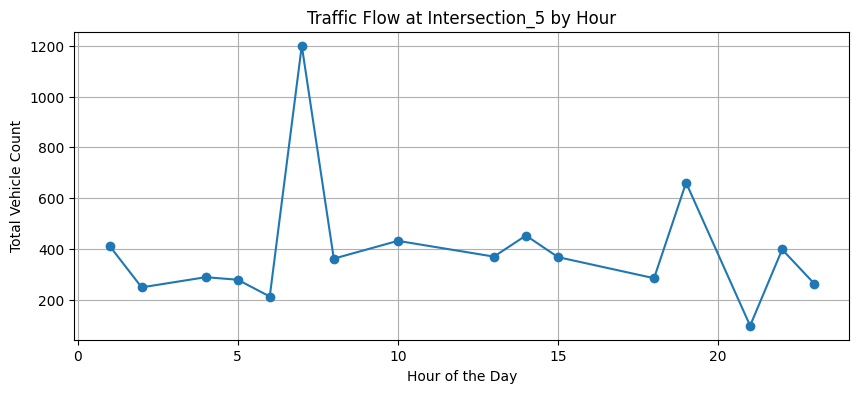

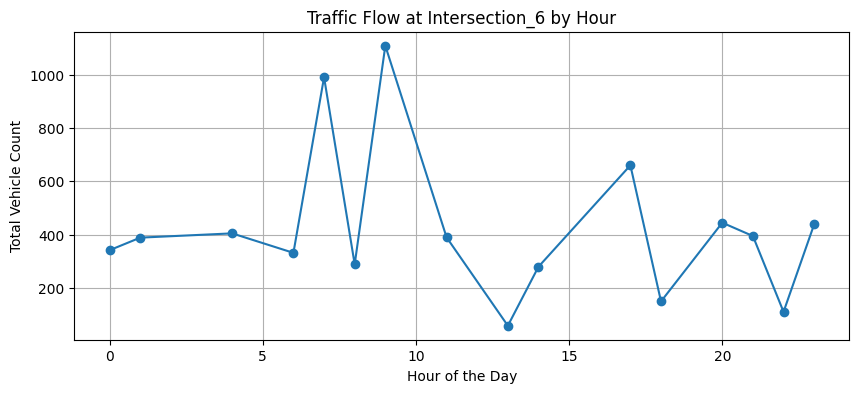

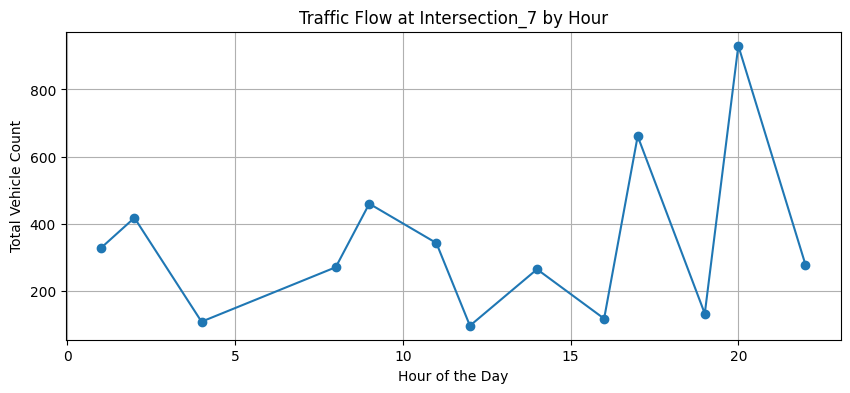

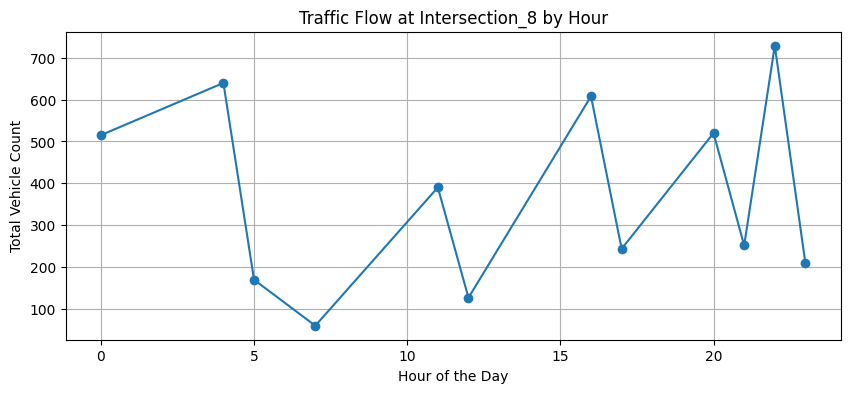

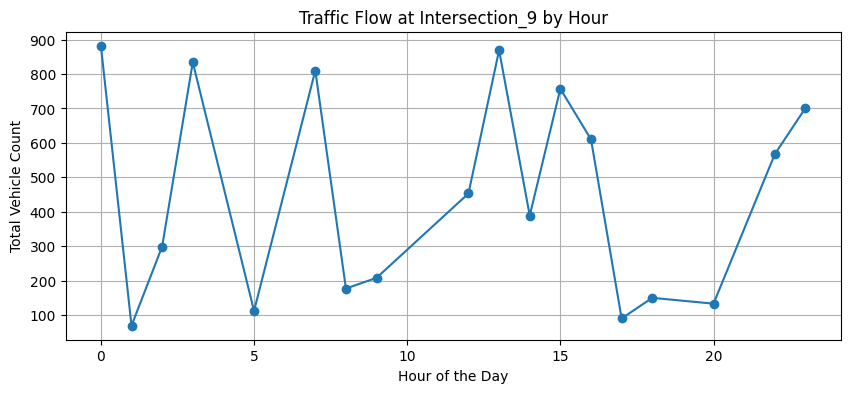

In [ ]:
traffic_by_intersection_hour = traffic_flow_df.groupby(['Intersection', 'Hour']).agg({'Vehicle_Count': 'sum'}).reset_index()

for intersection in traffic_by_intersection_hour['Intersection'].unique():
    subset = traffic_by_intersection_hour[traffic_by_intersection_hour['Intersection'] == intersection]
    plt.figure(figsize=(10, 4))
    plt.plot(subset['Hour'], subset['Vehicle_Count'], marker='o')
    plt.title(f'Traffic Flow at {intersection} by Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Total Vehicle Count')
    plt.grid(True)
    plt.show()



Signal Timings Insights:

Green Light Duration ranges from 41 to 111 seconds.
Red Light Duration ranges from 41 to 119 seconds.
The average green and red light durations are approximately 71 and 74 seconds, respectively.
Traffic Flow Insights:

The Vehicle Count ranges from 50 to 499 vehicles per hour.
Peak traffic trends are visible in some intersections, notably around typical rush hours (7–10 AM, 5–8 PM), but a deeper dive will give more precise insights.

Correlation Insights:

Vehicle Count vs. Green Light Duration: Weak positive correlation (0.15), indicating that longer green lights slightly increase the vehicle flow but not significantly.
Vehicle Count vs. Red Light Duration: Very weak positive correlation (0.07), suggesting red light duration has minimal impact on overall traffic volume.
Green Light vs. Red Light Duration: Moderate correlation (0.45), indicating that intersections with longer green lights tend to have longer red lights as well, possibly for balance.
Visual Insights:

Scatter plots suggest no strong linear relationship between light durations and traffic flow, implying other factors (like intersection design, vehicle types, or time of day) may have more influence.


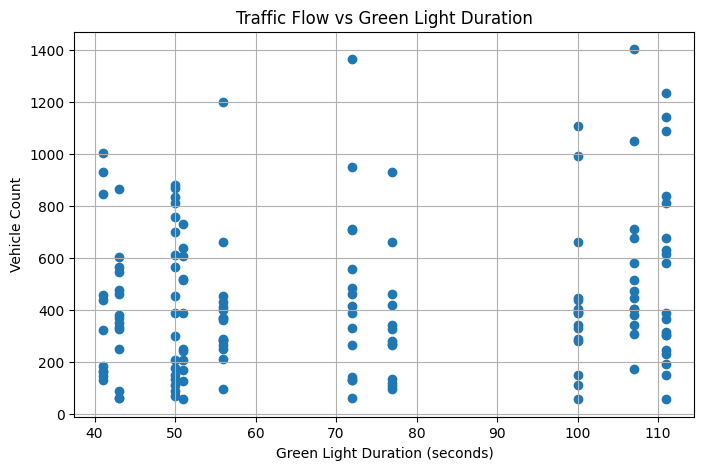

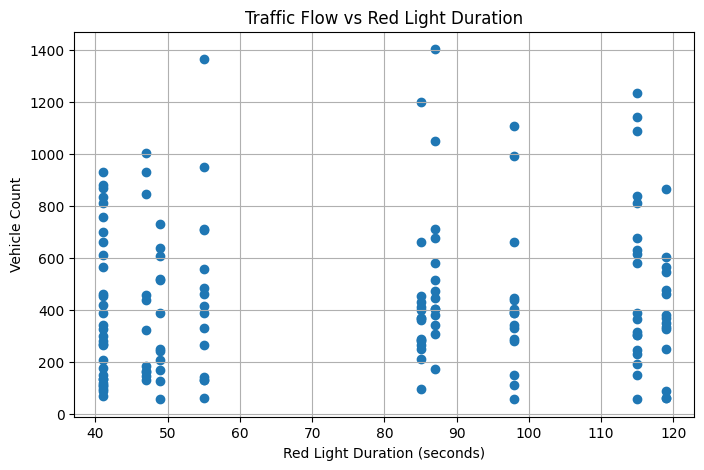

In [26]:
merged_df = pd.merge(traffic_flow_df, signal_timings_df, on='Intersection', how='inner')

traffic_signal_grouped = merged_df.groupby(['Intersection', 'Hour']).agg({
    'Vehicle_Count': 'sum',
    'Green_Light_Duration': 'mean',
    'Red_Light_Duration': 'mean'
}).reset_index()

correlation_matrix = traffic_signal_grouped[['Vehicle_Count', 'Green_Light_Duration', 'Red_Light_Duration']].corr()

plt.figure(figsize=(8, 5))
plt.scatter(traffic_signal_grouped['Green_Light_Duration'], traffic_signal_grouped['Vehicle_Count'])
plt.title('Traffic Flow vs Green Light Duration')
plt.xlabel('Green Light Duration (seconds)')
plt.ylabel('Vehicle Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(traffic_signal_grouped['Red_Light_Duration'], traffic_signal_grouped['Vehicle_Count'])
plt.title('Traffic Flow vs Red Light Duration')
plt.xlabel('Red Light Duration (seconds)')
plt.ylabel('Vehicle Count')
plt.grid(True)
plt.show()


In [52]:
peak_traffic_intersections = traffic_signal_grouped.groupby('Intersection').agg({'Vehicle_Count': 'mean'}).sort_values(by='Vehicle_Count', ascending=False).reset_index()
peak_hours = traffic_signal_grouped.groupby('Hour').agg({'Vehicle_Count': 'sum'}).sort_values(by='Vehicle_Count', ascending=False).reset_index()
top_intersections = peak_traffic_intersections.head()
top_peak_hours = peak_hours

print(top_peak_hours)

    Hour  Vehicle_Count
0      3           4534
1      7           4367
2     17           4028
3      0           3742
4      9           3708
5     20           3534
6      4           3464
7     19           3219
8     21           2717
9     22           2643
10    13           2639
11    11           2555
12    23           2513
13     8           2303
14     6           2280
15     1           2243
16    10           2214
17    16           2209
18    18           2170
19     5           1897
20    15           1841
21    14           1826
22     2           1581
23    12           1540


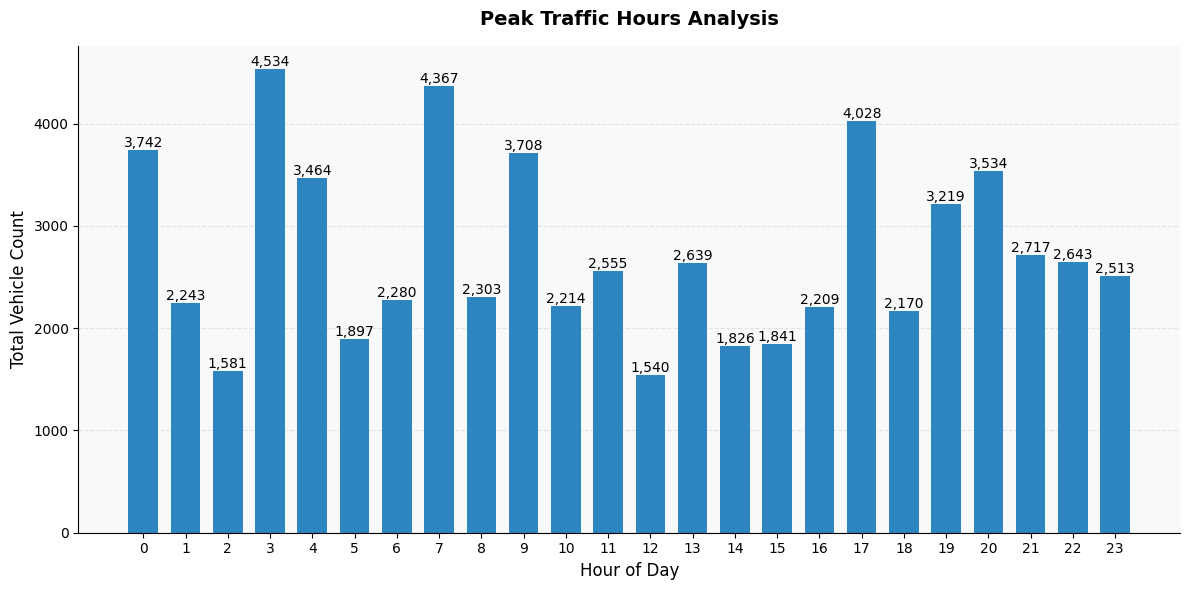

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(top_peak_hours['Hour'], top_peak_hours['Vehicle_Count'], 
              color='#2E86C1', width=0.7)

ax.set_title('Peak Traffic Hours Analysis', pad=15, fontsize=14, fontweight='bold')
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Total Vehicle Count', fontsize=12)

ax.set_xticks(range(0, 24))
ax.set_xticklabels(range(0, 24))  

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom')

ax.grid(True, axis='y', linestyle='--', alpha=0.3)

ax.set_axisbelow(True)
ax.set_facecolor('#f8f9fa')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

Correlation Matrix

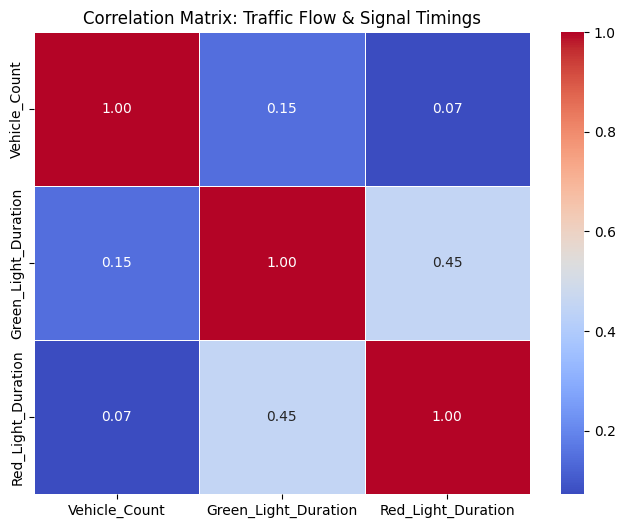

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Traffic Flow & Signal Timings')
plt.show()

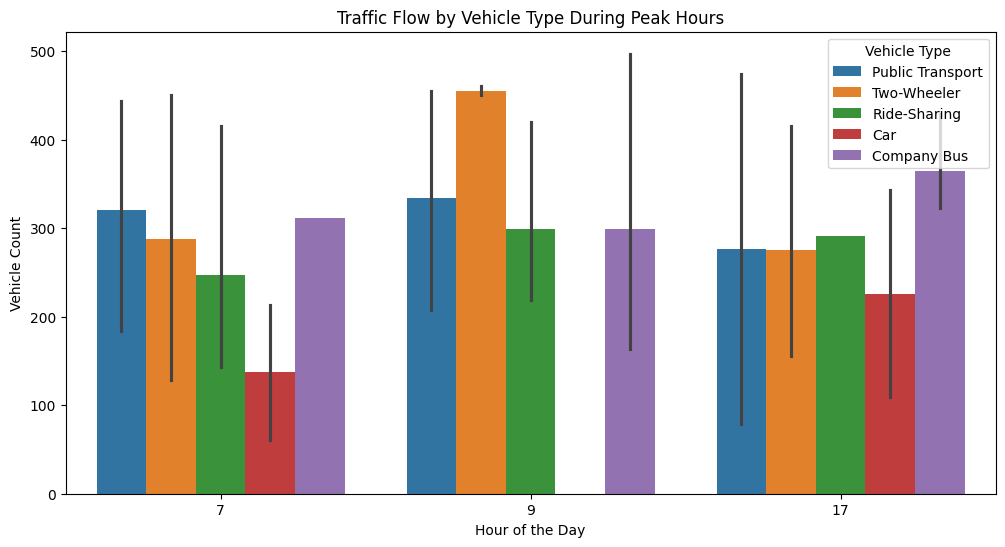

In [49]:
peak_hours_list = [7, 9, 17] 
traffic_peak_hours = traffic_flow_df[traffic_flow_df['Hour'].isin(peak_hours_list)]

plt.figure(figsize=(12, 6))
sns.barplot(data=traffic_peak_hours, x='Hour', y='Vehicle_Count', hue='Vehicle_Type')
plt.title('Traffic Flow by Vehicle Type During Peak Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Vehicle Count')
plt.legend(title='Vehicle Type')
plt.show()

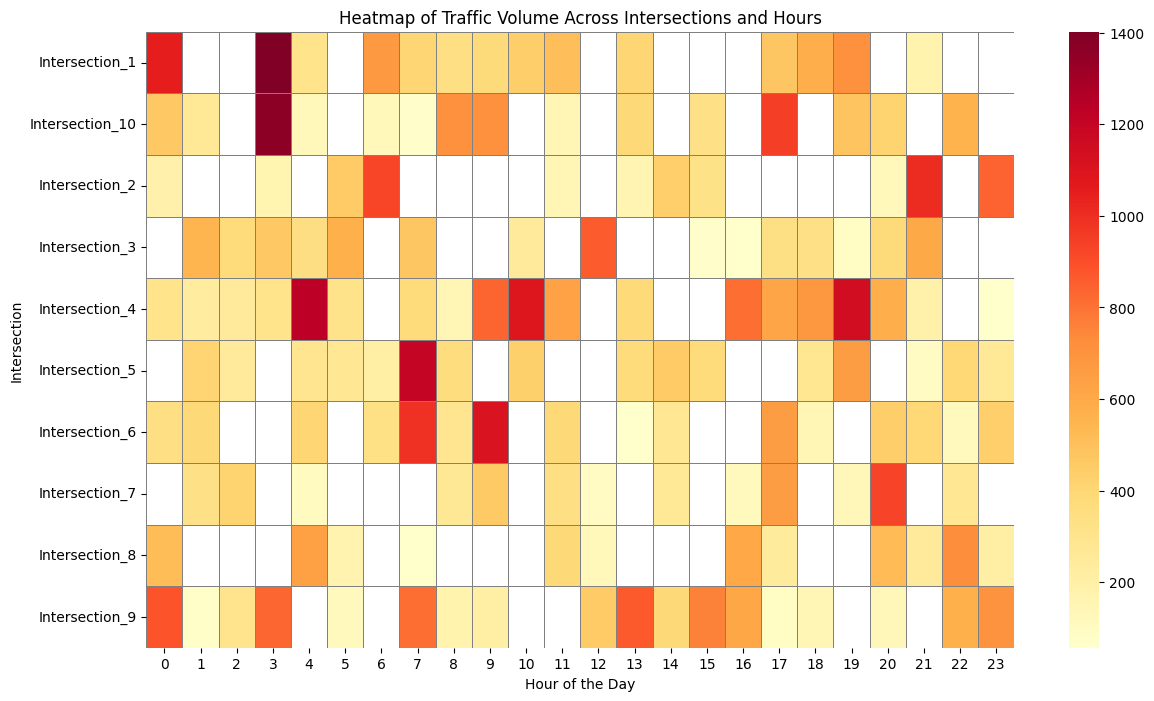

In [50]:
traffic_pivot = traffic_flow_df.pivot_table(values='Vehicle_Count', index='Intersection', columns='Hour', aggfunc='sum')

plt.figure(figsize=(14, 8))
sns.heatmap(traffic_pivot, cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title('Heatmap of Traffic Volume Across Intersections and Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Intersection')
plt.show()

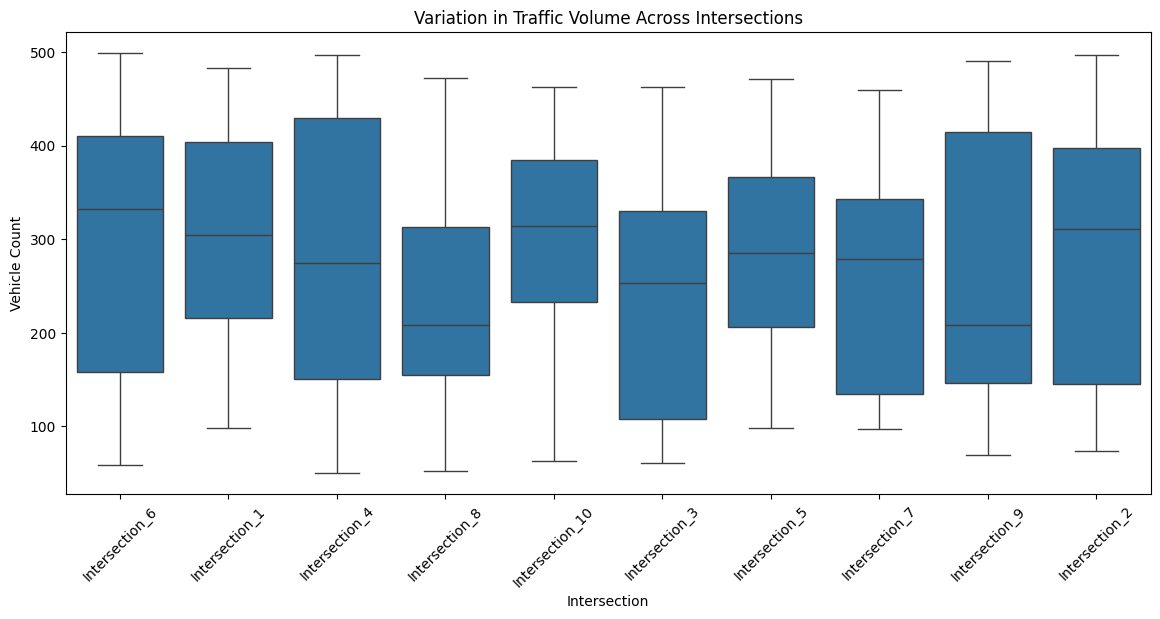

In [51]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=traffic_flow_df, x='Intersection', y='Vehicle_Count')
plt.title('Variation in Traffic Volume Across Intersections')
plt.xlabel('Intersection')
plt.ylabel('Vehicle Count')
plt.xticks(rotation=45)
plt.show()


Data Visualizations Supporting Recommendations:
Traffic Flow by Vehicle Type During Peak Hours:

Highlights the dominance of specific vehicle types (e.g., private cars, two-wheelers) during morning and evening rush hours.
Supports Strategies: Encouraging public transport and carpooling, adjusting signal timings for high-volume vehicle types.
Heatmap of Traffic Volume Across Intersections and Hours:

Identifies intersections with persistent congestion at different times of the day.
Supports Strategies: Adaptive signal control, dynamic police deployment, and targeted infrastructure improvements at key intersections.
Variation in Traffic Volume Across Intersections (Boxplot):

Shows variability in traffic at each intersection, indicating where consistent or sporadic congestion occurs.
Supports Strategies: Intersection-specific layout optimizations and tailored signal timing adjustments.

recommendation - 
1. Adaptive Traffic Signal Control (ATSC)
Insight: Weak correlation between traffic flow and current static signal timings suggests inefficiencies in uniform light durations across intersections.

Strategy:

Implement AI-driven adaptive signal control systems that dynamically adjust green and red light durations based on real-time traffic data.
Sensors and cameras at intersections to monitor vehicle counts and adjust timings to reduce wait times during peak hours.
Justification:

Since static light durations are not strongly linked to traffic flow, adaptive systems can better respond to fluctuating conditions, especially during morning (7–10 AM) and evening (5–8 PM) rush hours.<br>
2. Peak Hour Traffic Signal Reconfiguration
Insight: The top congestion hours are at 3 AM, 7 AM, 5 PM, 9 AM, and even midnight, indicating unusual traffic surges, likely due to IT professionals’ flexible schedules and shift timings.

Strategy:

Extend green light durations at major intersections during morning and evening peak hours, focusing on routes leading to and from tech hubs.
Implement directional prioritization where traffic moving towards tech parks in the morning and away in the evening gets longer green signals.
Justification:

Customizing light durations during high-traffic periods will ease congestion without affecting flow during off-peak hours.<br>
3. Intersection Layout Optimization
Insight: Some intersections consistently show high vehicle counts regardless of signal timings.

Strategy:

Widen key intersections or create dedicated lanes for specific vehicle types (e.g., separate lanes for company buses and two-wheelers).
Introduce roundabouts or flyovers where feasible to minimize the need for signal stops.
Justification:

Improving physical infrastructure can alleviate persistent congestion, especially where signal timing adjustments alone are insufficient.<br>
4. Encourage Public Transport and Carpooling
Insight: High usage of private cars and ride-sharing services contributes significantly to congestion.

Strategy:

Subsidize or incentivize the use of public transport, like Chennai Metro Rail's new corridor.
Encourage carpooling through tax incentives or dedicated carpool lanes during peak hours.
Expand company shuttle services with designated pickup and drop-off points to reduce individual vehicle usage.
Justification:

Reducing the number of private vehicles will directly ease congestion, especially during peak times.<br>
5. Enhanced Traffic Police Deployment and Smart Monitoring
Insight: Police presence aligns with peak hours, but certain late-night and early-morning hours (e.g., 3 AM, midnight) show unexpected congestion.

Strategy:

Deploy traffic officers strategically based on dynamic congestion data rather than static schedules.
Use CCTV and drone surveillance for remote monitoring and rapid response during off-peak congestion.
Justification:

Dynamic deployment will help manage unexpected traffic surges, ensuring smoother flow even during unconventional peak hours.<br>
6. Data-Driven Continuous Monitoring & Feedback Loops
Insight: Correlation analysis and traffic patterns may evolve with changing infrastructure and commuting behaviors.

Strategy:

Establish a real-time traffic monitoring dashboard to continuously collect data, analyze patterns, and update traffic management strategies.
Feedback mechanisms from commuters (via apps or public forums) to identify and address new bottlenecks promptly.
Justification:

Continuous improvement ensures that traffic management strategies remain effective as the area grows and develops.

Forecasting using ML

23:54:59 - cmdstanpy - INFO - Chain [1] start processing
23:54:59 - cmdstanpy - INFO - Chain [1] done processing


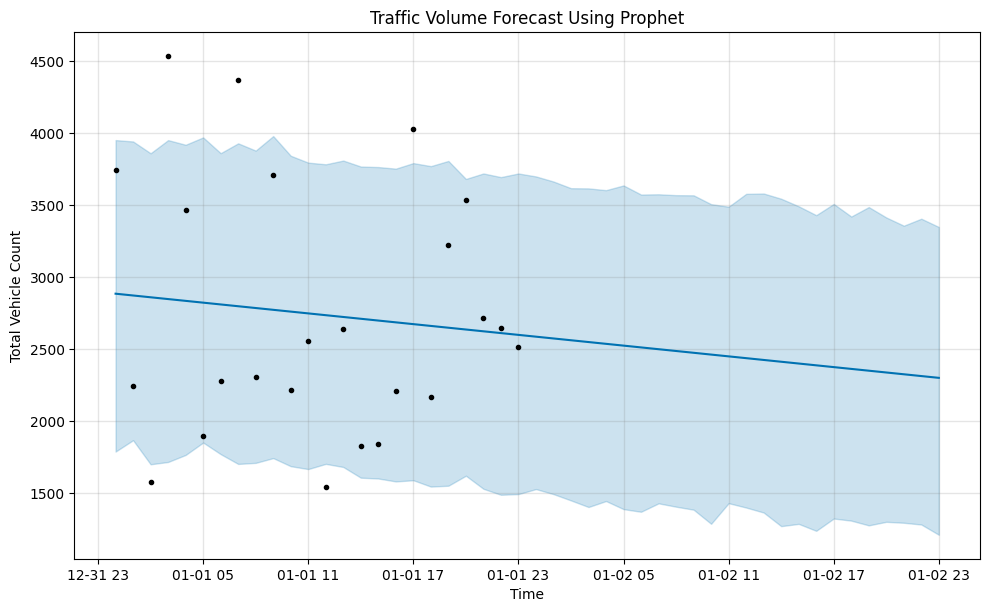

In [ ]:
from prophet import Prophet 

traffic_flow_time_series = traffic_flow_df.groupby(['Hour']).agg({'Vehicle_Count': 'sum'}).reset_index()
traffic_flow_time_series.rename(columns={'Hour': 'ds', 'Vehicle_Count': 'y'}, inplace=True)

traffic_flow_time_series['ds'] = pd.to_datetime(traffic_flow_time_series['ds'], format='%H')

prophet_model = Prophet()
prophet_model.fit(traffic_flow_time_series)

future = prophet_model.make_future_dataframe(periods=24, freq='h')
forecast = prophet_model.predict(future)

fig = prophet_model.plot(forecast)
plt.title('Traffic Volume Forecast Using Prophet')
plt.xlabel('Time')
plt.ylabel('Total Vehicle Count')
plt.show()


d:\EY_task\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
d:\EY_task\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
d:\EY_task\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


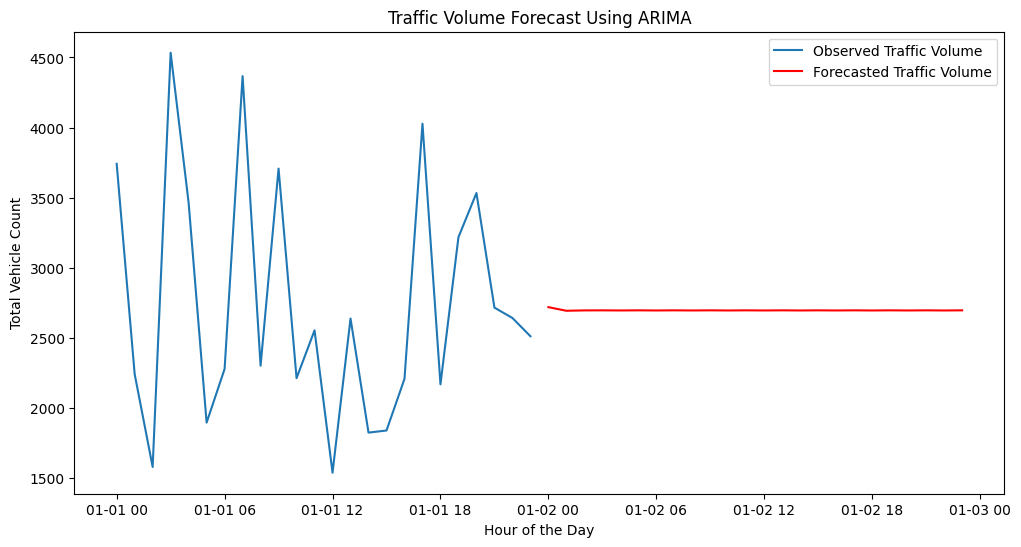

In [ ]:
#visualization - 
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

traffic_flow_series = traffic_flow_df.groupby('Hour')['Vehicle_Count'].sum()
traffic_flow_series.index = pd.to_datetime(traffic_flow_series.index, format='%H')

arima_model = ARIMA(traffic_flow_series, order=(2, 1, 2))
arima_result = arima_model.fit()

forecast = arima_result.get_forecast(steps=24)
forecast_index = pd.date_range(start=traffic_flow_series.index[-1] + pd.Timedelta(hours=1), periods=24, freq='h')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(traffic_flow_series, label='Observed Traffic Volume')
plt.plot(forecast_series, label='Forecasted Traffic Volume', color='red')
plt.title('Traffic Volume Forecast Using ARIMA')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Vehicle Count')
plt.legend()
plt.show()


Anomly Detection

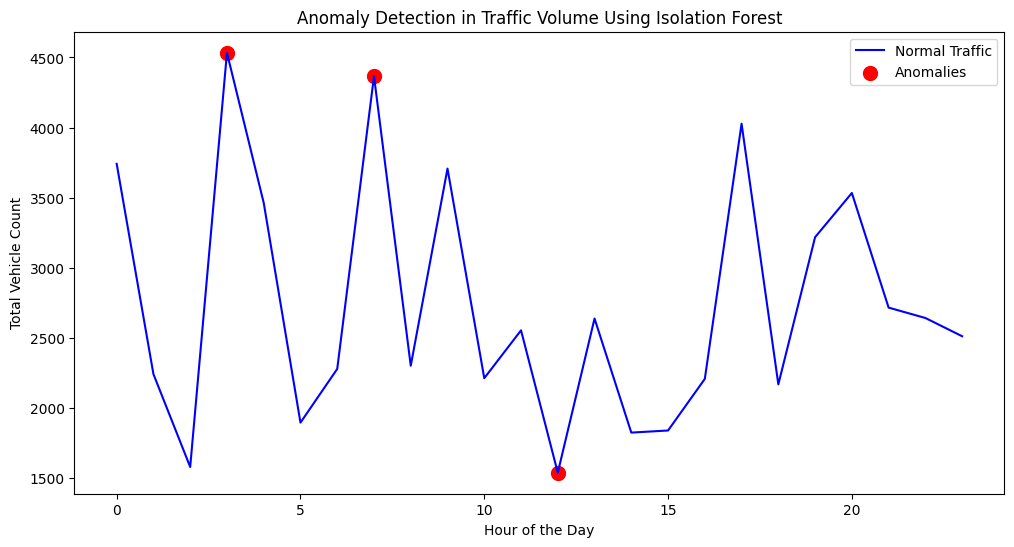

In [ ]:
##Anomly detection - 
from sklearn.ensemble import IsolationForest

anomaly_df = traffic_flow_df.groupby(['Hour']).agg({'Vehicle_Count': 'sum'}).reset_index()

isolation_forest = IsolationForest(contamination=0.1, random_state=42)
anomaly_df['anomaly'] = isolation_forest.fit_predict(anomaly_df[['Vehicle_Count']])

anomalies = anomaly_df[anomaly_df['anomaly'] == -1]

plt.figure(figsize=(12, 6))
plt.plot(anomaly_df['Hour'], anomaly_df['Vehicle_Count'], label='Normal Traffic', color='blue')
plt.scatter(anomalies['Hour'], anomalies['Vehicle_Count'], color='red', label='Anomalies', s=100)
plt.title('Anomaly Detection in Traffic Volume Using Isolation Forest')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Vehicle Count')
plt.legend()
plt.show()


In [25]:
print(anomalies)

    Hour  Vehicle_Count  anomaly
3      3           4534       -1
7      7           4367       -1
12    12           1540       -1


SARIMA Analysis

d:\EY_task\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
d:\EY_task\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
d:\EY_task\myvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
d:\EY_task\myvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\ARUN\AppData\Local\T

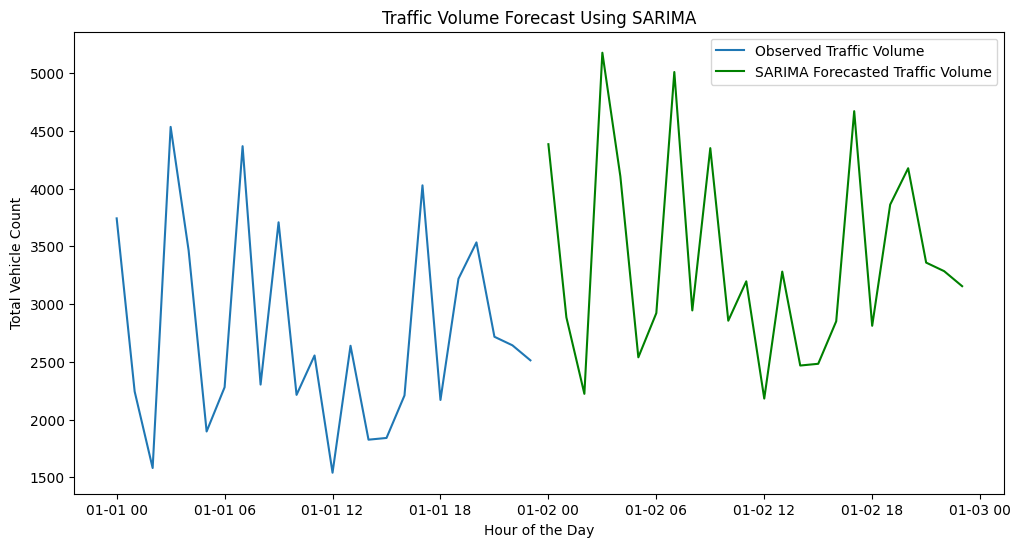

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

traffic_flow_series = traffic_flow_df.groupby('Hour')['Vehicle_Count'].sum()
traffic_flow_series.index = pd.to_datetime(traffic_flow_series.index, format='%H')

sarima_model = SARIMAX(traffic_flow_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
sarima_result = sarima_model.fit(disp=False)

sarima_forecast = sarima_result.get_forecast(steps=24)
forecast_index = pd.date_range(start=traffic_flow_series.index[-1] + pd.Timedelta(hours=1), periods=24, freq='H')
sarima_forecast_series = pd.Series(sarima_forecast.predicted_mean.values, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(traffic_flow_series, label='Observed Traffic Volume')
plt.plot(sarima_forecast_series, label='SARIMA Forecasted Traffic Volume', color='green')
plt.title('Traffic Volume Forecast Using SARIMA')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Vehicle Count')
plt.legend()
plt.show()

Random Forest Analysis

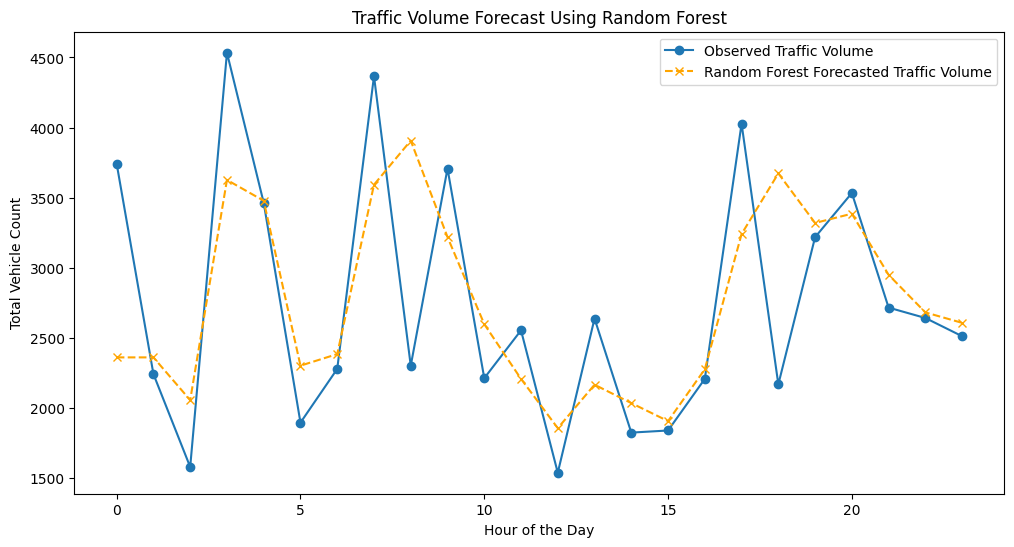

minimum squared error for Random forest regressor:  1372868.74192


In [40]:
#Random forest analysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

ml_df = traffic_flow_df.groupby(['Hour']).agg({'Vehicle_Count': 'sum'}).reset_index()

X = ml_df[['Hour']]
y = ml_df['Vehicle_Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

future_hours = pd.DataFrame({'Hour': np.arange(24)})
rf_forecast = rf_model.predict(future_hours)

plt.figure(figsize=(12, 6))
plt.plot(ml_df['Hour'], ml_df['Vehicle_Count'], label='Observed Traffic Volume', marker='o')
plt.plot(future_hours['Hour'], rf_forecast, label='Random Forest Forecasted Traffic Volume', color='orange', linestyle='--', marker='x')
plt.title('Traffic Volume Forecast Using Random Forest')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Vehicle Count')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, rf_model.predict(X_test))
print("minimum squared error for Random forest regressor: ",mse)


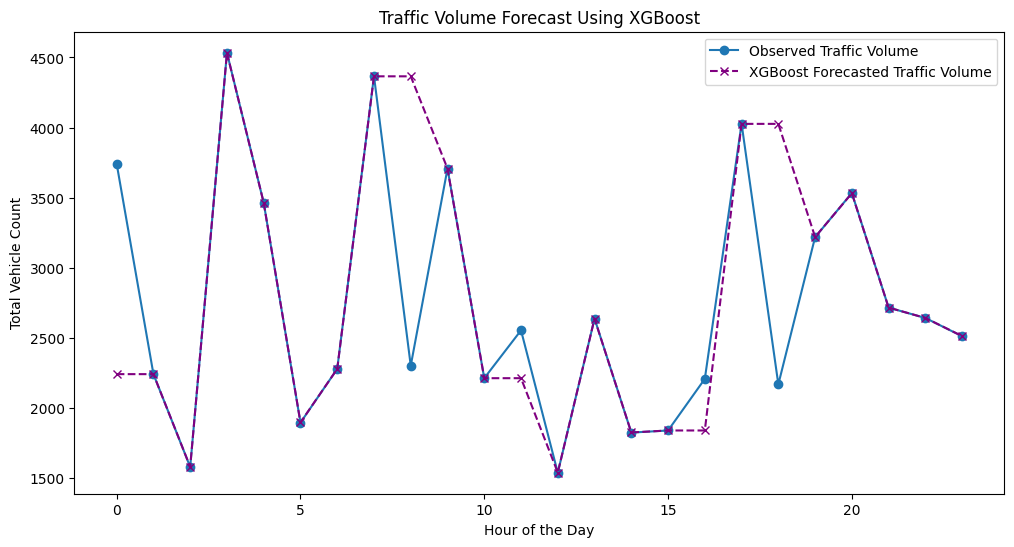

Mean Squared Error (MSE) for XGBoost: 2040443.625


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

ml_df = traffic_flow_df.groupby(['Hour']).agg({'Vehicle_Count': 'sum'}).reset_index()

X = ml_df[['Hour']]
y = ml_df['Vehicle_Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=60, random_state=42)
xgb_model.fit(X_train, y_train)

future_hours = pd.DataFrame({'Hour': np.arange(24)})
xgb_forecast = xgb_model.predict(future_hours)

plt.figure(figsize=(12, 6))
plt.plot(ml_df['Hour'], ml_df['Vehicle_Count'], label='Observed Traffic Volume', marker='o')
plt.plot(future_hours['Hour'], xgb_forecast, label='XGBoost Forecasted Traffic Volume', color='purple', linestyle='--', marker='x')
plt.title('Traffic Volume Forecast Using XGBoost')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Vehicle Count')
plt.legend()
plt.show()

xgb_mse = mean_squared_error(y_test, xgb_model.predict(X_test))
print(f"Mean Squared Error (MSE) for XGBoost: {xgb_mse}")

we observe that the MSE using Random Forest Regressor is less, so we use Random Forest Regressor.